# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [213]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# mouse_metadata
study_results

# Combine the data into a single dataset (merge)
tumor_data_df = pd.merge(mouse_metadata, study_results, how='inner',on='Mouse ID')
tumor_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
treatment_data = tumor_data_df
treatment_data = tumor_data_df['Drug Regimen'].value_counts()
treatment_data

# This method is the most straighforward, creating multiple series and putting them all together at the end.


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

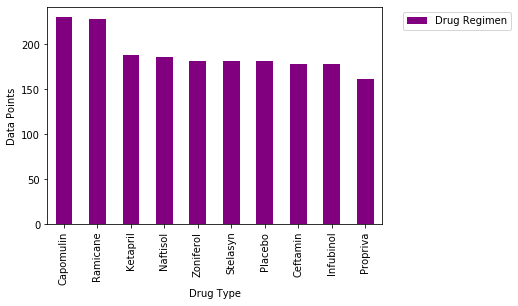

In [215]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_data.plot(kind="bar", color='purple')
plt.legend(loc='best', bbox_to_anchor=(1.4, 1))
plt.xlabel("Drug Type")
plt.ylabel("Data Points")
plt.show()

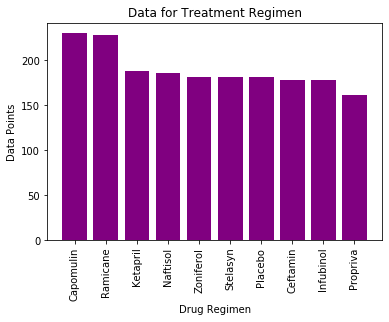

In [216]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# x_axis=tumor_data_df treatment_data.index.values
# y_axis= treatment_data.values
plt.bar(treatment_data.index.values,treatment_data.values, color="purple")

# handles=[drug_data.index,drug_data["Mean Tumor Volume"]]
# handles=[drug_data.index,drug_data["Median Tumor Volume"]]


plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.xticks(rotation=90)
plt.title('Data for Treatment Regimen')


plt.show()

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data_df.groupby('Tumor Volume (mm3)')
tumor_data_df
# This method produces everything in a single groupby function


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar and Pie Charts

In [218]:
tumor_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


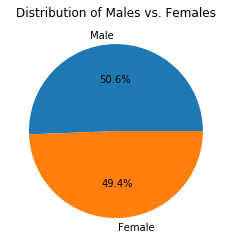

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(df.values,labels=counts.index.values,autopct='%1.1f%%')

gender_data = tumor_data_df
gender_data = tumor_data_df['Sex'].value_counts()
gender_data

labels=["Male","Female"]
counts=[958, 935]

plt.pie(gender_data.values, labels=labels ,autopct='%1.1f%%')
plt.title("Distribution of Males vs. Females")
plt.show()

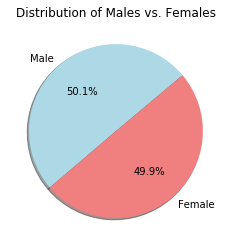

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ["lightblue", "lightcoral"]
values = [958, 953]
explode = [0,0]
axis="equal"
plt.title("Distribution of Males vs. Females")

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.show()

In [221]:
tumor_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [222]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# #Start by getting the last (greatest) timepoint for each mouse

max_tumor_size = tumor_data_df.groupby(["Mouse ID"]).max()
# print(max_tumor_size)
max_tumor_size = max_tumor_size.reset_index()
# print(max_tumor_size)

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor = max_tumor_size[['Mouse ID', 'Timepoint']].merge(tumor_data_df,on=['Mouse ID','Timepoint'],how='left')
merge_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [223]:
# Quantitatively determine capomulin outliers
capomulin = tumor_data_df.loc[tumor_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']

cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


In [224]:
# Quantitatively determine ramicane outliers

ramicane = tumor_data_df.loc[tumor_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']

rami_quartiles = ramicane.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < rami_lower_bound) | (ramicane > rami_upper_bound)]}")

Ramicane potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64


In [225]:
# Quantitatively determine infubinol outliers

Infubinol = tumor_data_df.loc[tumor_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']

inf_quartiles = Infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < inf_lower_bound) | (Infubinol > inf_upper_bound)]}")

Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [226]:
# Quantitatively determine ceftamin outliers

ceftamin = tumor_data_df.loc[tumor_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < ceftamin_lower_bound) | (ceftamin > ceftamin_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'Regimen')

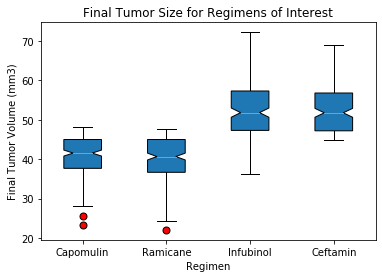

In [227]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outliers = dict(markerfacecolor="red",markersize=7)
box_plot = plt.boxplot([capomulin,ramicane,Infubinol,ceftamin],labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops = outliers, patch_artist=True,notch=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Size for Regimens of Interest')
plt.xlabel('Regimen')

## Line and Scatter Plots

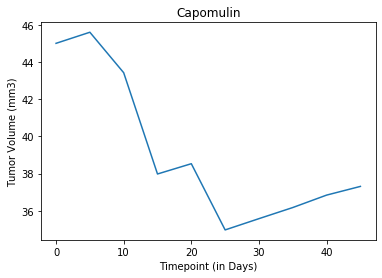

In [228]:
# Generate a line graph of timepoint versus tumor volume for a mouse treated with Capomulin
capomulin = tumor_data_df.loc[tumor_data_df['Drug Regimen']== "Capomulin"]
# capomulin
mouse =  capomulin.loc[capomulin['Mouse ID']== "i738"]
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.xlabel ('Timepoint (in Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin')
plt.show()

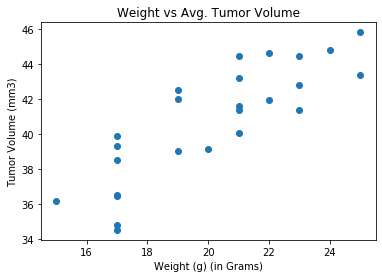

In [229]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
# capomulin

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel ('Weight (g) (in Grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Avg. Tumor Volume')
plt.show()

In [230]:
tumor_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Correlation and Regression

The correlation between both factors is 0.84


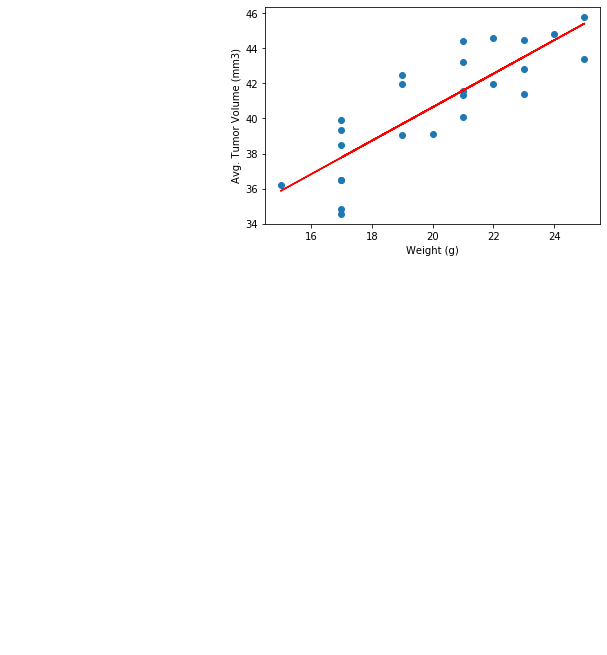

In [238]:
# Calculate the correlation coefficient (first) and linear regression model (second) 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
capomulin

# weight = capomulin.iloc[:,5]
# volume = capomulin.iloc[:,7]

linier_corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between both factors is {linier_corr}")

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()
